In [7]:
import nitools as nt
import nibabel as nb
from Functional_Fusion import reliability as rel
import numpy as np
import globals as gl
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

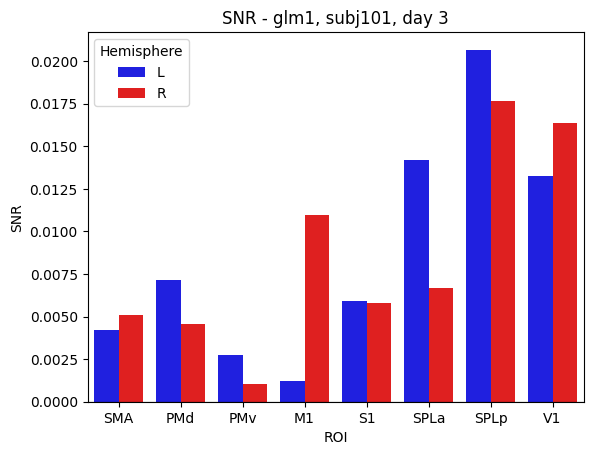

In [8]:
# Define parameters
experiment = 'efc4'
glm = 1
sn = 101
atlas = 'ROI'

# Storage for SNR values
snr_dict = {
    'ROI': [],
    'Hemisphere': [],
    'SNR': []
}

path_glm = os.path.join(gl.baseDir, experiment, f'{gl.glmDir}{glm}', f'subj{sn}')
path_rois = os.path.join(gl.baseDir, experiment, gl.roiDir, f'subj{sn}')

# Iterate through hemispheres and ROIs
for H in ['L', 'R']:
    for roi in gl.rois['ROI']:
        beta_img = os.path.join(gl.baseDir, experiment,  f'glm{glm}', f'subj{sn}','beta.dscalar.nii')
        res_img = os.path.join(gl.baseDir, experiment,  f'glm{glm}', f'subj{sn}','ResMS.nii')
        mask = os.path.join(gl.baseDir, experiment, gl.roiDir, f'subj{sn}',f'{atlas}.{H}.{roi}.nii')

        beta_cifti = nb.load(beta_img)
        res_nifti = nb.load(res_img)

        beta_nifti = nt.volume_from_cifti(beta_cifti, struct_names = ['CortexLeft', 'CortexRight'])
        coords = nt.get_mask_coords(mask)

        betas = nt.sample_image(beta_nifti, coords[0], coords[1], coords[2], interpolation=0).T

        res = nt.sample_image(res_nifti, coords[0], coords[1], coords[2], interpolation=0)

        betas_prewhitened = betas / np.sqrt(res)

        betas_prewhitened = np.array(betas_prewhitened)
        betas_prewhitened = betas_prewhitened[:, ~np.all(np.isnan(betas_prewhitened), axis=0)]

        reginfo = np.char.split(beta_cifti.header.get_axis(0).name, sep='.')
        conds = np.array([r[0] for r in reginfo][::2])
        run = np.array([r[1] for r in reginfo][::2])

        snr = rel.within_subj(betas_prewhitened[::2], conds, run,)
        # snr_avg = snr.mean()
        # snr_err = snr.std()

        snr_dict['ROI'].append(roi)
        snr_dict['Hemisphere'].append(H)
        snr_dict['SNR'].append(snr[0])

# Convert to DataFrame
snr_df = pd.DataFrame(snr_dict)

# Pivot Data for Faceted Plot
fig, axs = plt.subplots()
sns.barplot(data=snr_df, y='SNR', x='ROI', hue='Hemisphere', palette={'L': 'blue', 'R': 'red'},ax=axs, )

# Formatting
# axs.set_xlabel("region")
axs.axhline(0, color='k', lw=.8)
axs.set_ylabel("SNR")
axs.set_title(f'SNR - glm{glm}, subj{sn}, day 3')
axs.legend(title="Hemisphere")
plt.show()


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f297b28ae90>>
Traceback (most recent call last):
  File "/home/UWO/memanue5/Documents/GitHub/extension-flexion-chords/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


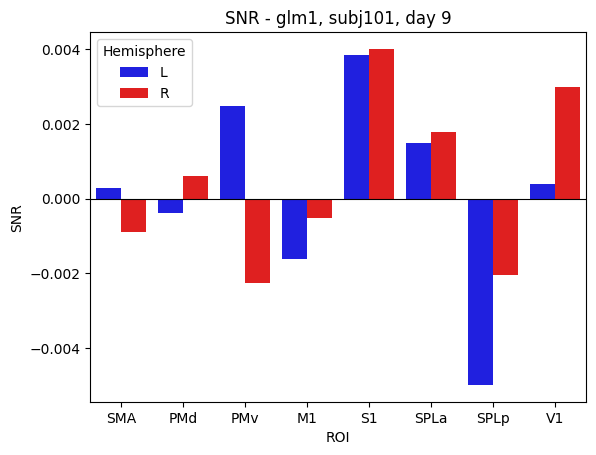

In [9]:
# Define parameters
experiment = 'efc4'
glm = 1
sn = 101
atlas = 'ROI'
H = 'L'

# Storage for SNR values
snr_dict = {
    'ROI': [],
    'Hemisphere': [],
    'SNR': []
}

path_glm = os.path.join(gl.baseDir, experiment, f'{gl.glmDir}{glm}', f'subj{sn}')
path_rois = os.path.join(gl.baseDir, experiment, gl.roiDir, f'subj{sn}')

# Iterate through hemispheres and ROIs
for H in ['L', 'R']:
    for roi in gl.rois['ROI']:
        beta_img = os.path.join(gl.baseDir, experiment,  f'glm{glm}', f'subj{sn}','beta.dscalar.nii')
        res_img = os.path.join(gl.baseDir, experiment,  f'glm{glm}', f'subj{sn}','ResMS.nii')
        mask = os.path.join(gl.baseDir, experiment, gl.roiDir, f'subj{sn}',f'{atlas}.{H}.{roi}.nii')

        beta_cifti = nb.load(beta_img)
        res_nifti = nb.load(res_img)

        beta_nifti = nt.volume_from_cifti(beta_cifti, struct_names = ['CortexLeft', 'CortexRight'])
        coords = nt.get_mask_coords(mask)

        betas = nt.sample_image(beta_nifti, coords[0], coords[1], coords[2], interpolation=0).T

        res = nt.sample_image(res_nifti, coords[0], coords[1], coords[2], interpolation=0)

        betas_prewhitened = betas / np.sqrt(res)

        betas_prewhitened = np.array(betas_prewhitened)
        betas_prewhitened = betas_prewhitened[:, ~np.all(np.isnan(betas_prewhitened), axis=0)]

        reginfo = np.char.split(beta_cifti.header.get_axis(0).name, sep='.')
        conds = np.array([r[0] for r in reginfo][1::2])
        run = np.array([r[1] for r in reginfo][1::2])

        snr = rel.within_subj(betas_prewhitened[1::2], conds, run,)
        # snr_avg = snr.mean()
        # snr_err = snr.std()

        snr_dict['ROI'].append(roi)
        snr_dict['Hemisphere'].append(H)
        snr_dict['SNR'].append(snr[0])

# Convert to DataFrame
snr_df = pd.DataFrame(snr_dict)

# Pivot Data for Faceted Plot
fig, axs = plt.subplots()
sns.barplot(data=snr_df, y='SNR', x='ROI', hue='Hemisphere', palette={'L': 'blue', 'R': 'red'},ax=axs, )

# Formatting
# axs.set_xlabel("region")
axs.axhline(0, color='k', lw=.8)
axs.set_ylabel("SNR")
axs.set_title(f'SNR - glm{glm}, subj{sn}, day 9')
axs.legend(title="Hemisphere")
plt.show()

In [ ]:
# Define parameters
experiment = 'efc4'
glm = 1
sn = 101
atlas = 'ROI'

# Storage for SNR values
snr_dict = {
    'ROI': [],
    'Hemisphere': [],
    'SNR': []
}

path_glm = os.path.join(gl.baseDir, experiment, f'{gl.glmDir}{glm}', f'subj{sn}')
path_rois = os.path.join(gl.baseDir, experiment, gl.roiDir, f'subj{sn}')

# Iterate through hemispheres and ROIs
for H in ['L', 'R']:
    for roi in gl.rois['ROI']:
        beta_img = os.path.join(gl.baseDir, experiment,  f'glm{glm}', f'subj{sn}','beta.dscalar.nii')
        res_img = os.path.join(gl.baseDir, experiment,  f'glm{glm}', f'subj{sn}','ResMS.nii')
        mask = os.path.join(gl.baseDir, experiment, gl.roiDir, f'subj{sn}',f'{atlas}.{H}.{roi}.nii')

        beta_cifti = nb.load(beta_img)
        res_nifti = nb.load(res_img)

        beta_nifti = nt.volume_from_cifti(beta_cifti, struct_names = ['CortexLeft', 'CortexRight'])
        coords = nt.get_mask_coords(mask)

        betas = nt.sample_image(beta_nifti, coords[0], coords[1], coords[2], interpolation=0).T

        res = nt.sample_image(res_nifti, coords[0], coords[1], coords[2], interpolation=0)

        betas_prewhitened = betas / np.sqrt(res)

        betas_prewhitened = np.array(betas_prewhitened)
        betas_prewhitened = betas_prewhitened[:, ~np.all(np.isnan(betas_prewhitened), axis=0)]

        reginfo = np.char.split(beta_cifti.header.get_axis(0).name, sep='.')
        conds = np.array([r[0].split(',')[0] for r in reginfo])
        run = np.array([
            int(r[1]) + 10 if 'day9' in r[0] else int(r[1])
            for r in reginfo
        ])

        snr = rel.within_subj_loo(betas_prewhitened, conds, run, separate='none')
        # snr_avg = snr.mean()
        # snr_err = snr.std()

        snr_dict['ROI'].append(roi)
        snr_dict['Hemisphere'].append(H)
        snr_dict['SNR'].append(snr[0])

# Convert to DataFrame
snr_df = pd.DataFrame(snr_dict)

# Pivot Data for Faceted Plot
fig, axs = plt.subplots()
sns.barplot(data=snr_df, y='SNR', x='ROI', hue='Hemisphere', palette={'L': 'blue', 'R': 'red'},ax=axs, )

# Formatting
# axs.set_xlabel("region")
axs.axhline(0, color='k', lw=.8)
axs.set_ylabel("SNR")
axs.set_title(f'SNR - glm{glm}, subj{sn}, day 3')
axs.legend(title="Hemisphere")
plt.show()